The blue rectangle represents the crate that we want to rotate by $90^\circ$ in order to align its long side with wall 1. The initial and final orientations are defined as $\theta_0=\pi/2$ and $\theta_f=\pi$. Wall 2 rotates about point $P$ at constant angular velocity.

![pivoting_wall.png](../memoire_makette/pivoting_wall.png)


We assume the following quantities are known:

* $m_{\mathrm{wall}_2}$: mass of wall 2
* $m$: mass of the blue bin
* $J_c$: moment of inertia of the bin about the pivot point $P$
* $a$: length of the bin (long side)
* $b$: width of the bin (short side)
* $\mu$: coefficient of friction at the contact with the wall

We want to determine the input forces applied to the bin in order to rotate it while keeping the contact points as close as possible to their initial locations (i.e., avoiding slip). To do so, we write the equations of motion of the system and later embed them into an optimization problem.

On considère une plaque rectangulaire rigide se déplaçant dans le plan, en interaction avec un mur motorisé pivotant autour d’un point fixe $𝑃_w = (0,0)$. Le mur impose une orientation prescrite $\phi(t)$ (rotation uniforme de 0 à $\pi/2$ en $T = 6s$), tandis que le bac est contrôlée par une force appliquée au centre de masse. Deux points de la plaque peuvent entrer en contact avec le mur : le coin inférieur gauche A et le coin supérieur gauche B. Les contacts sont modélisés comme des contacts unilatéraux (ouvrants), avec frottement de Coulomb en adhérence (bornes sur la force tangentielle).

Pour commencer voici les états du système:

$$
x(t)=
\begin{bmatrix}
x_C(t)\\
y_C(t)\\
\theta(t)\\
v_x(t)\\
v_y(t)\\
\omega(t)
\end{bmatrix}
\qquad\text{with}\qquad
\omega(t)=\dot{\theta}(t)
$$

Ni l'angle, ni la vitesse du mur qui pivote ne sont pris en compte dans l'état du système vu que l'angle et prescrit. Le mur pivote autour de $P_w$ selon un angle imposé $\phi(t)$ à vitesse angulaire constante $\Omega$.
$$
  \phi(t)=\phi_0+\Omega t,
  \qquad
  \Omega=\frac{\phi_T-\phi_0}{T},
  \qquad
  P_w\in\mathbb{R}^2
  $$


Entrée de commande est une force appliquée au centre de masse, bornée par une norme maximale pour empêcher tout tilting de la pile de bac. 
$$
F(t)=
  \begin{bmatrix}
  F_x(t)\\
  F_y(t)
  \end{bmatrix},
  \qquad \|F(t)\|\le F_{\max}
  $$

Multiplicateurs de contact (forces de contact dans la base normale/tangentielle)
Chaque contact $P\in\{A,B\}$ est représenté par une force normale $\lambda_{nP}$ et une force tangentielle $\lambda_{tP}$.
$$
  \lambda_A(t)=
  \begin{bmatrix}
  \lambda_{nA}(t)\\
  \lambda_{tA}(t)
  \end{bmatrix},
  \qquad
  \lambda_B(t)=
  \begin{bmatrix}
  \lambda_{nB}(t)\\
  \lambda_{tB}(t)
  \end{bmatrix}
$$



Les contacts sont formulé dans la base et au top du mur qui pivote avec $t(\phi),\,n(\phi)$ attachée au mur.
$$
  t(\phi)=
  \begin{bmatrix}
  -\sin\phi\\
  \cos\phi
  \end{bmatrix},
  \qquad
  n(\phi)=
  \begin{bmatrix}
  \cos\phi\\
  \sin\phi
  \end{bmatrix}
  $$

Gap aux deux points de contact A et B
 Le gap $g_P(t)$ mesure la distance signée du point $P$ à la droite du mur : $g_P>0$ signifie contact ouvert, $g_P=0$ contact fermé.
$$
  g_A(t)=n(\phi(t))^\top\big(p_A(t)-P_w\big),
  \qquad
  g_B(t)=n(\phi(t))^\top\big(p_B(t)-P_w\big)
  $$

Force de contact appliquée sur la plaque aux points A et B
La force de contact est la combinaison de la composante normale et de la composante tangentielle dans la base du mur.
$$
  F_{cA}(t)=\lambda_{nA}(t)\,n(\phi(t))+\lambda_{tA}(t)\,t(\phi(t)),
  \qquad
  F_{cB}(t)=\lambda_{nB}(t)\,n(\phi(t))+\lambda_{tB}(t)\,t(\phi(t))
  $$

Couple (moment) des forces de contact autour du centre de masse
Chaque force de contact génère un couple autour du centre de masse via le bras de levier $r_P(t)$.
$$
  \tau_A(t)=r_A(t)\times F_{cA}(t),
  \qquad
  \tau_B(t)=r_B(t)\times F_{cB}(t)
  $$

Produit vectoriel 2D (scalaire) utilisé pour le moment
En dynamique plane, le moment est un scalaire donné par la pseudo-norme du produit vectoriel.
$$
  r\times f \;:=\; r_x f_y - r_y f_x
  $$

Point cible pour le coin B sur le mur (référence géométrique)
La référence $(p_{B,\mathrm{ref}}(t))$ est le point situé à distance $b$ le long de la tangente du mur, ce qui correspond au déplacement souhaité de $B$ lorsque le mur pivote.
$$
  p_{B,\mathrm{ref}}(t)=P_w + b\,t(\phi(t))
  $$



Tout ce problème peut être traduit par une problème à minimier d'une somme pondérée de critères de robotique de contact : (i) suivi d’orientation de la plaque par rapport au mur, (ii) effort de commande, (iii) maintien de la proximité au mur via les gaps, (iv) relaxation de la complémentarité contact (contact ouvert), (v) régularisation des forces de contact, (vi) suivi en espace opérationnel du coin $B$, et (vii) pénalités terminales. Des coefficients $q_\bullet$ permettent d’ajuster l’importance relative de chaque terme. On impose ces équations pour tout $t\in[0,T]$ car elles décrivent la physique continue du système : la cinématique et la dynamique doivent être satisfaites à chaque instant du mouvement, et pas uniquement au début ou à la fin.

$$
\begin{aligned}
J \;=\;
&\int_{0}^{T}
\Big(
q_\theta\,(\theta(t)-\phi(t))^2
\;+\;
q_u\,\|F(t)\|^2
\Big)\,dt
\\
&+
\int_{0}^{T}
q_{\mathrm{gap}}\Big(g_A(t)^2 + g_B(t)^2\Big)\,dt
\\
&+
\int_{0}^{T}
q_{\mathrm{comp}}\Big(\lambda_{nA}(t)^2\,g_A(t)^2 + \lambda_{nB}(t)^2\,g_B(t)^2\Big)\,dt
\\
&+
\int_{0}^{T}
q_{\lambda}\Big(\|\lambda_A(t)\|^2+\|\lambda_B(t)\|^2\Big)\,dt
\\
&+
\int_{0}^{T}
q_{B}\,\big\|p_B(t)-p_{B,\mathrm{ref}}(t)\big\|^2\,dt
\\
&+
q_{T\theta}\,(\theta(T)-\phi(T))^2
\;+\;
q_{T\omega}\,\omega(T)^2 .
\end{aligned}
$$

Ce qui donne: 

$$
\begin{aligned}
\underset{
\substack{
p_C(\cdot),\,\theta(\cdot),\,v_C(\cdot),\,\omega(\cdot),\\
F(\cdot),\\
\lambda_A(\cdot),\,\lambda_B(\cdot)
}
}{\text{minimize}}
\quad
&
\int_{0}^{T}
\Big(
q_\theta\,(\theta(t)-\phi(t))^2
\;+\;
q_u\,\|F(t)\|^2
\Big)\,dt
\\
&\quad
+\int_{0}^{T}
q_{\text{gap}}\Big(g_A(t)^2 + g_B(t)^2\Big)\,dt
+\int_{0}^{T}
q_{\text{comp}}\Big(\lambda_{nA}(t)^2\,g_A(t)^2 + \lambda_{nB}(t)^2\,g_B(t)^2\Big)\,dt
\\
&\quad
+\int_{0}^{T}
q_\lambda\Big(\|\lambda_A(t)\|^2+\|\lambda_B(t)\|^2\Big)\,dt
+\int_{0}^{T}
q_B\,\big\|p_B(t)-p_{B,\text{ref}}(t)\big\|^2\,dt
\\
&\quad
+\;q_{T\theta}\,(\theta(T)-\phi(T))^2
+\;q_{T\omega}\,\omega(T)^2
\\[4pt]
\text{subject to}\quad
&
\dot p_C(t)=v_C(t),\qquad t\in[0,T]
\\
&
m\,\dot v_C(t)=F(t)+F_{cA}(t)+F_{cB}(t),\qquad t\in[0,T]
\\
&
\dot\theta(t)=\omega(t),\qquad t\in[0,T]
\\
&
I_{com}\,\dot\omega(t)=\tau_A(t)+\tau_B(t),\qquad t\in[0,T]
\\[4pt]
&
\|F(t)\|\le F_{\max},\qquad t\in[0,T]
\\[4pt]
&
g_A(t)\ge 0,\quad g_B(t)\ge 0,\qquad t\in[0,T]
\\
&
\lambda_{nA}(t)\ge 0,\quad \lambda_{nB}(t)\ge 0,\qquad t\in[0,T]
\\
&
-\mu\,\lambda_{nA}(t)\le \lambda_{tA}(t)\le \mu\,\lambda_{nA}(t),\qquad t\in[0,T]
\\
&
-\mu\,\lambda_{nB}(t)\le \lambda_{tB}(t)\le \mu\,\lambda_{nB}(t),\qquad t\in[0,T]
\\[4pt]
&
x(0)=x_0
\qquad\text{(conditions initiales fixées)}.
\end{aligned}
$$







This is Ipopt version 3.14.11, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:     2884
Number of nonzeros in inequality constraint Jacobian.:     1199
Number of nonzeros in Lagrangian Hessian.............:     1916

Total number of variables............................:     1206
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      726
Total number of inequality constraints...............:      600
        inequality constraints with only lower bounds:      240
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      360

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  1.0800005e+07 5.14e-01 1.00e+02   0.0 0.00e+00    -  0.00e+00 0.00e+00 

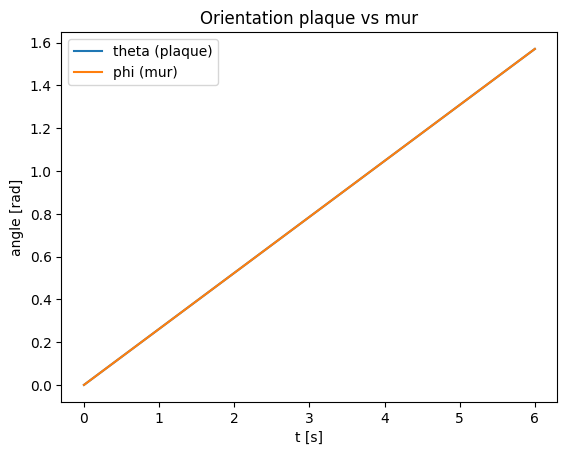

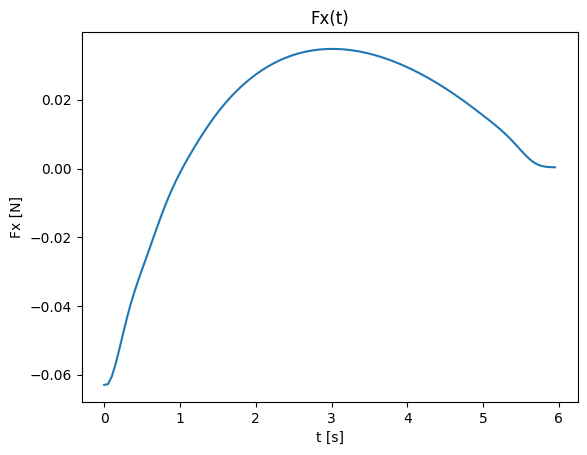

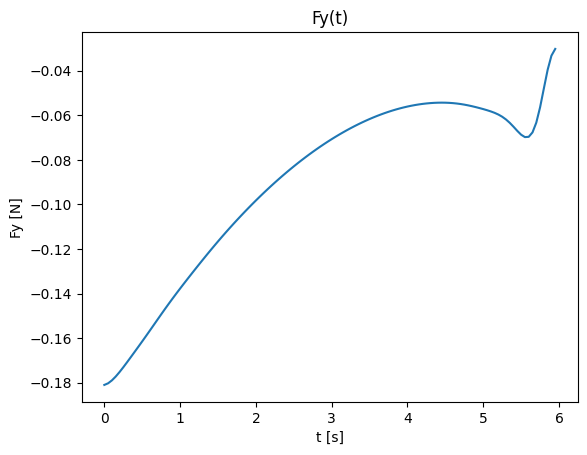

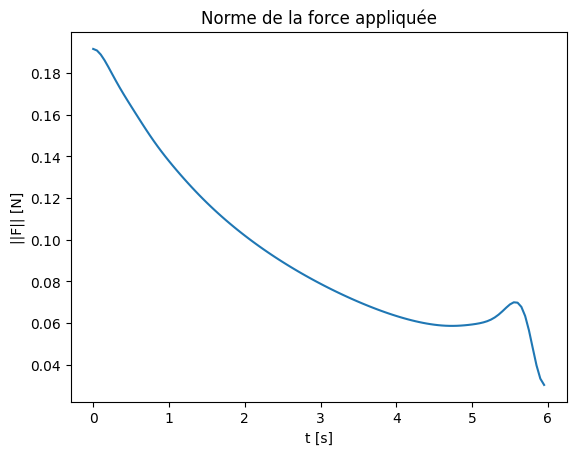

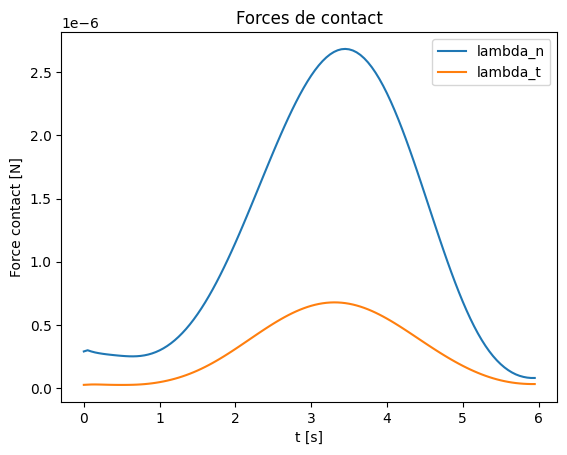

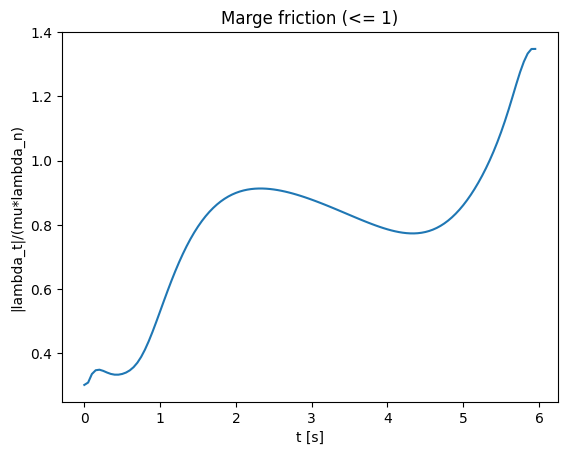

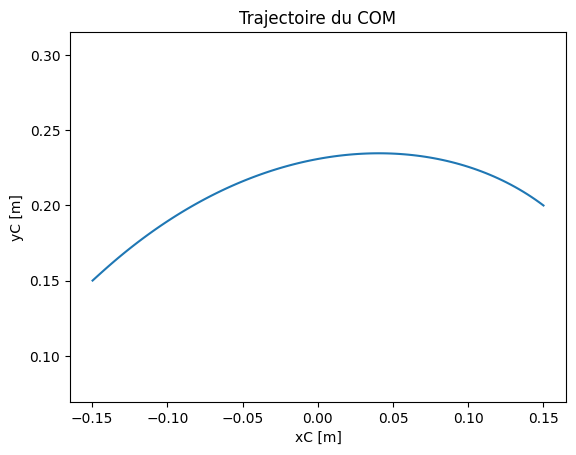

A(0) = 0.0 0.0


In [ ]:
import casadi as ca
import numpy as np
import matplotlib.pyplot as plt


def rot_np(angle: float) -> np.ndarray:
    c = np.cos(angle)
    s = np.sin(angle)
    return np.array([[c, -s],
                     [s,  c]], dtype=float)


def solve_ocp_contact_sticking_with_wall_guess():
    a = 0.300   # m
    b = 0.400   # m
    m = 7.0     # kg
    mu = 0.3
    Fmax = 40.0 # N

    T = 6.0
    dt = 0.05
    N = int(T / dt)
    phi0 = 0.0
    phiT = +np.pi / 2
    Omega = (phiT - phi0) / T 

    Pw = np.array([0.0, 0.0], dtype=float) 

    #inertia around pivot
    Icom = (m / 3.0) * (a*a + b*b)

    
    rA_b = np.array([-a/2.0, -b/2.0], dtype=float)

    # -----------------------
    # Tuning parameters
    # -----------------------
    q_theta = 1000.0        
    q_u = 1e-3          
    q_du = 1e-2         
    q_lam = 1e2        
    qT_theta = 20.0
    qT_omega = 50.0
    q_gap = 1e3
    q_comp = 1e3  # à ajuster


    u0 = 0.0  # m (ajustable)

    tgrid = np.linspace(0.0, T, N+1)
    phi_guess = phi0 + Omega * tgrid
    theta_guess = phi_guess.copy()
    omega_guess = np.ones(N+1) * Omega

    pA_guess = np.zeros((N+1, 2), dtype=float)
    pC_guess = np.zeros((N+1, 2), dtype=float)
    vC_guess = np.zeros((N+1, 2), dtype=float)

    for k in range(N+1):
        ph = phi_guess[k]
        # Tangente wall: t(phi) = [-sin(phi), cos(phi)]  (phi=0 => vertical +y)
        tvec = np.array([-np.sin(ph), np.cos(ph)], dtype=float)
        pA_guess[k, :] = Pw + u0 * tvec

        Rk = rot_np(theta_guess[k])
        pC_guess[k, :] = pA_guess[k, :] - (Rk @ rA_b)

    # vitesses du COM par différences finies
    vC_guess[1:, :] = (pC_guess[1:, :] - pC_guess[:-1, :]) / dt
    vC_guess[0, :] = vC_guess[1, :]

    # -----------------------
    # CasADi Opti
    # -----------------------
    opti = ca.Opti()

    # states : (xC, yC, theta, vx, vy, omega) on N+1
    xC = opti.variable(N+1)
    yC = opti.variable(N+1)
    th = opti.variable(N+1)
    vx = opti.variable(N+1)
    vy = opti.variable(N+1)
    om = opti.variable(N+1)

    #input
    Fx = opti.variable(N)
    Fy = opti.variable(N)

    
    lam_n = opti.variable(N)
    lam_t = opti.variable(N)

    # -----------------------
    # Initial constraints
    # -----------------------
    opti.subject_to(xC[0] == float(pC_guess[0, 0]))
    opti.subject_to(yC[0] == float(pC_guess[0, 1]))
    opti.subject_to(th[0] == float(theta_guess[0]))
    opti.subject_to(vx[0] == float(vC_guess[0, 0]))
    opti.subject_to(vy[0] == float(vC_guess[0, 1]))
    opti.subject_to(om[0] == float(omega_guess[0]))

    # -----------------------
    # Functions
    # -----------------------
    def Rot(angle):
        c = ca.cos(angle)
        s = ca.sin(angle)
        return ca.vertcat(
            ca.horzcat(c, -s),
            ca.horzcat(s,  c)
        )

    J = 0

    for k in range(N):
        tk = tgrid[k]
        phi_k = phi0 + Omega * tk

        
        tvec = ca.vertcat(-ca.sin(phi_k), ca.cos(phi_k))  # tangent
        nvec = ca.vertcat( ca.cos(phi_k), ca.sin(phi_k))  # normal 

        # Rotation crate
        Rk = Rot(th[k])

        
        pCk = ca.vertcat(xC[k], yC[k])
        rA_world = Rk @ ca.DM(rA_b)     
        pAk = pCk + rA_world

        
        vCk = ca.vertcat(vx[k], vy[k])
        vAk = vCk + om[k] * ca.vertcat(-rA_world[1], rA_world[0])

        
        rWk = pAk - ca.DM(Pw)
        vWk = Omega * ca.vertcat(-rWk[1], rWk[0])

        vrel = vAk - vWk

        # -----------------------
        # Contact constraints
        # -----------------------
        gk = nvec.T @ (pAk - ca.DM(Pw))
        opti.subject_to(gk >= 0)
        # Keep contact between crate and wall
        J += q_gap * gk**2

        # no slip: relative speed = 0 
        # opti.subject_to(tvec.T @ vrel == 0)
        # opti.subject_to(nvec.T @ vrel == 0)

        # Coulomb friction 
        opti.subject_to(lam_n[k] >= 0)
        opti.subject_to(lam_t[k] <=  mu * lam_n[k])
        opti.subject_to(lam_t[k] >= -mu * lam_n[k])
        J += q_comp * (lam_n[k] * gk)**2

        # max applicable force
        opti.subject_to(Fx[k]**2 + Fy[k]**2 <= Fmax**2)

        # contact force on the crate
        Fc = lam_n[k] * nvec + lam_t[k] * tvec

        # -----------------------
        # Dynamic
        # -----------------------
        # COM translation: m aC = F + Fc
        axk = (Fx[k] + Fc[0]) / m
        ayk = (Fy[k] + Fc[1]) / m

        opti.subject_to(xC[k+1] == xC[k] + dt * vx[k])
        opti.subject_to(yC[k+1] == yC[k] + dt * vy[k])
        opti.subject_to(vx[k+1] == vx[k] + dt * axk)
        opti.subject_to(vy[k+1] == vy[k] + dt * ayk)

        tau_c = rA_world[0] * Fc[1] - rA_world[1] * Fc[0]
        alphak = tau_c / Icom

        opti.subject_to(th[k+1] == th[k] + dt * om[k])
        opti.subject_to(om[k+1] == om[k] + dt * alphak)

        # -----------------------
        # Cost function 
        # -----------------------
        # Tracking léger vers la cinématique imposée du mur
        J += q_theta * (th[k] - phi_k)**2

        # Effort + lissage
        J += q_u * (Fx[k]**2 + Fy[k]**2)
        if k < N-1:
            J += q_du * ((Fx[k+1] - Fx[k])**2 + (Fy[k+1] - Fy[k])**2)

        # Régularisation très légère sur lambdas (stabilise)
        J += q_lam * (lam_n[k]**2 + lam_t[k]**2)


    # final position 
    phi_end = phi0 + Omega * tgrid[N]
    J += qT_theta * (th[N] - phi_end)**2 + qT_omega * (om[N])**2

    opti.minimize(J)

    # -----------------------
    # Initial guesses
    # -----------------------
    opti.set_initial(xC, pC_guess[:, 0])
    opti.set_initial(yC, pC_guess[:, 1])
    opti.set_initial(th, theta_guess)
    opti.set_initial(vx, vC_guess[:, 0])
    opti.set_initial(vy, vC_guess[:, 1])
    opti.set_initial(om, omega_guess)

    # Guess forces (guess)
    Fx_guess = np.zeros(N)
    Fy_guess = np.zeros(N)
    Fx_guess[0] = -10.0
    Fy_guess[0] = 0.0
    opti.set_initial(Fx, Fx_guess)
    opti.set_initial(Fy, Fy_guess)

    # Guess lambdas
    opti.set_initial(lam_n, 30.0)
    opti.set_initial(lam_t, 0.0)

    # -----------------------
    # Solver options
    # -----------------------
    p_opts = {"expand": True}
    s_opts = {
        "max_iter": 8000,
        "tol": 1e-7,
        "acceptable_tol": 1e-5,
        "acceptable_iter": 50,
        "mu_strategy": "adaptive",
        "print_level": 5
    }
    opti.solver("ipopt", p_opts, s_opts)

    sol = opti.solve()

    # -----------------------
    # Extraction
    # -----------------------
    out = {
        "t": tgrid,
        "phi": phi0 + Omega * tgrid,
        "Omega": Omega,
        "xC": sol.value(xC),
        "yC": sol.value(yC),
        "th": sol.value(th),
        "vx": sol.value(vx),
        "vy": sol.value(vy),
        "om": sol.value(om),
        "Fx": sol.value(Fx),
        "Fy": sol.value(Fy),
        "lam_n": sol.value(lam_n),
        "lam_t": sol.value(lam_t),
        "mu": mu,
        "Fmax": Fmax,
    }
    return out


def plot_out(out):
    t = out["t"]
    Fx = out["Fx"]
    Fy = out["Fy"]
    ln = out["lam_n"]
    lt = out["lam_t"]

    plt.figure()
    plt.plot(t, out["th"], label="theta (plaque)")
    plt.plot(t, out["phi"], label="phi (mur)")
    plt.xlabel("t [s]")
    plt.ylabel("angle [rad]")
    plt.title("Orientation plaque vs mur")
    plt.legend()

    plt.figure()
    plt.plot(t[:-1], Fx)
    plt.xlabel("t [s]")
    plt.ylabel("Fx [N]")
    plt.title("Fx(t)")

    plt.figure()
    plt.plot(t[:-1], Fy)
    plt.xlabel("t [s]")
    plt.ylabel("Fy [N]")
    plt.title("Fy(t)")

    plt.figure()
    plt.plot(t[:-1], np.sqrt(Fx**2 + Fy**2))
    plt.xlabel("t [s]")
    plt.ylabel("||F|| [N]")
    plt.title("Norme de la force appliquée")

    plt.figure()
    plt.plot(t[:-1], ln, label="lambda_n")
    plt.plot(t[:-1], lt, label="lambda_t")
    plt.xlabel("t [s]")
    plt.ylabel("Force contact [N]")
    plt.title("Forces de contact")
    plt.legend()

    ratio = np.abs(lt) / (out["mu"] * np.maximum(ln, 1e-9))
    plt.figure()
    plt.plot(t[:-1], ratio)
    plt.xlabel("t [s]")
    plt.ylabel("|lambda_t|/(mu*lambda_n)")
    plt.title("Marge friction (<= 1)")

    plt.figure()
    plt.plot(out["xC"], out["yC"])
    plt.xlabel("xC [m]")
    plt.ylabel("yC [m]")
    plt.title("Trajectoire du COM")
    plt.axis("equal")

    plt.show()


if __name__ == "__main__":
    out = solve_ocp_contact_sticking_with_wall_guess()
    print("max ||F|| =", np.max(np.sqrt(out["Fx"]**2 + out["Fy"]**2)), "N (<= Fmax)")
    ratio = np.abs(out["lam_t"]) / (out["mu"] * np.maximum(out["lam_n"], 1e-9))
    print("max friction ratio =", np.max(ratio), "(<= 1)")
    print("theta(T) =", out["th"][-1], "phi(T) =", out["phi"][-1])
    plot_out(out)

a = 0.3; b = 0.4
rA_b = np.array([-a/2, -b/2])

pAx = []
pAy = []
for k in range(len(out["t"])):
    th = out["th"][k]
    R = np.array([[np.cos(th), -np.sin(th)],
                  [np.sin(th),  np.cos(th)]])
    pA = np.array([out["xC"][k], out["yC"][k]]) + R @ rA_b
    pAx.append(pA[0]); pAy.append(pA[1])

print("A(0) =", pAx[0], pAy[0])



This is Ipopt version 3.14.11, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:     3602
Number of nonzeros in inequality constraint Jacobian.:     2158
Number of nonzeros in Lagrangian Hessian.............:     2637

Total number of variables............................:     1446
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      726
Total number of inequality constraints...............:     1080
        inequality constraints with only lower bounds:      480
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      600

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  2.1744269e+03 4.29e-01 1.25e+01   0.0 0.00e+00    -  0.00e+00 0.00e+00 

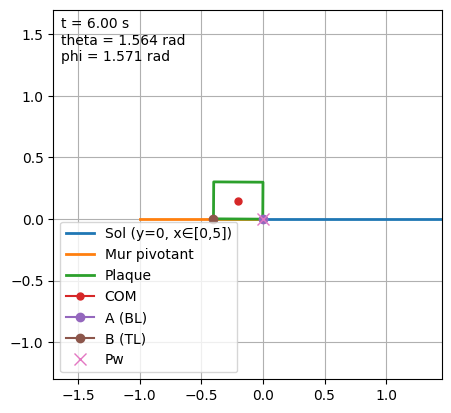

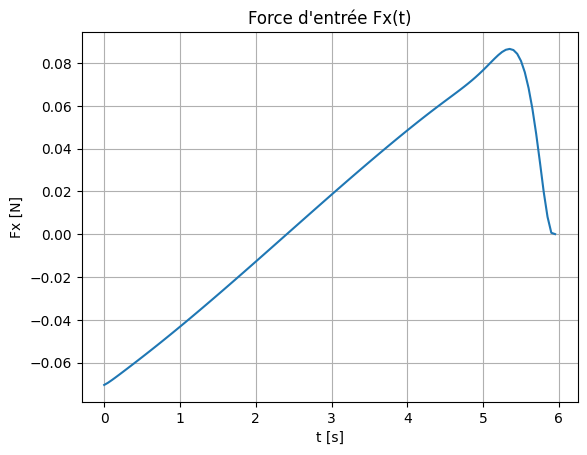

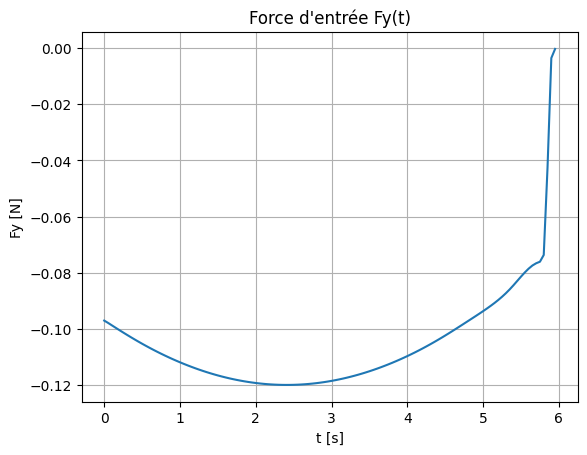

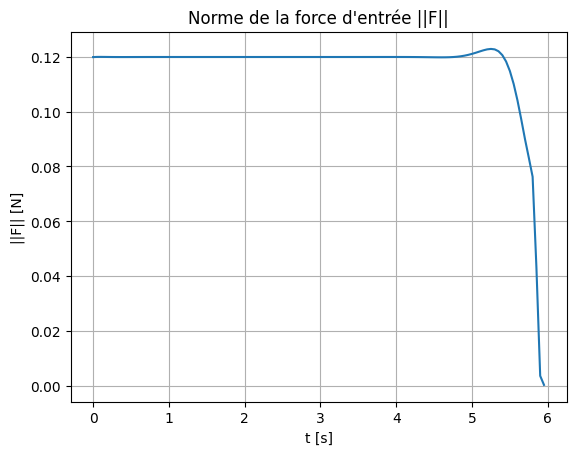

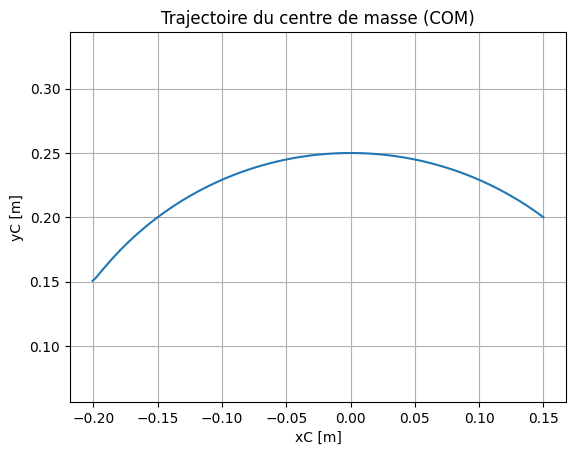

In [ ]:
import casadi as ca
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


def rot_np(angle: float) -> np.ndarray:
    c = np.cos(angle)
    s = np.sin(angle)
    return np.array([[c, -s],
                     [s,  c]], dtype=float)


def solve_ocp_two_contacts_open_with_gap_minimization():
    # -----------------------
    # Paramètres
    # -----------------------
    a = 0.300   # m
    b = 0.400   # m
    m = 7.0     # kg
    mu = 0.3
    Fmax = 40.0 # N

    T = 6.0
    dt = 0.05
    N = int(T / dt)

    # Mur motorisé : phi(t) de 0 à +pi/2 en T
    phi0 = 0.0
    phiT = +np.pi / 2
    Omega = (phiT - phi0) / T  # constant (rad/s)

    Pw = np.array([0.0, 0.0], dtype=float)

    # Inertie plaque (correcte)
    Icom = (m / 12.0) * (a*a + b*b)

    # Coins (repère corps, COM -> coin)
    rA_b = np.array([-a/2.0, -b/2.0], dtype=float)  # bottom-left
    rB_b = np.array([-a/2.0, +b/2.0], dtype=float)  # top-left

    # -----------------------
    # Poids du coût (tune)
    # -----------------------
    q_theta = 1000.0
    q_u = 1e-1
    q_du = 1e-2
    q_lam = 1e-2
    qT_theta = 20.0
    qT_omega = 50.0

    q_gap = 1e4
    q_comp = 1e5

    q_Btrack = 1e4  # suivre le point cible du coin B

    # -----------------------
    # Grille temps + guess
    # -----------------------
    tgrid = np.linspace(0.0, T, N+1)
    phi_guess = phi0 + Omega * tgrid
    theta_guess = phi_guess.copy()
    omega_guess = np.ones(N+1) * Omega

    pC_guess = np.zeros((N+1, 2), dtype=float)
    for k in range(N+1):
        ph = phi_guess[k]
        tvec_np = np.array([-np.sin(ph), np.cos(ph)], dtype=float)
        pA = Pw + 0.0 * tvec_np
        Rk = rot_np(theta_guess[k])
        pC_guess[k, :] = pA - (Rk @ rA_b)

    vC_guess = np.zeros((N+1, 2), dtype=float)
    vC_guess[1:, :] = (pC_guess[1:, :] - pC_guess[:-1, :]) / dt
    vC_guess[0, :] = vC_guess[1, :]

    # -----------------------
    # CasADi Opti
    # -----------------------
    opti = ca.Opti()

    # Etats
    xC = opti.variable(N+1)
    yC = opti.variable(N+1)
    th = opti.variable(N+1)
    vx = opti.variable(N+1)
    vy = opti.variable(N+1)
    om = opti.variable(N+1)

    # Entrées
    Fx = opti.variable(N)
    Fy = opti.variable(N)

    # Lambdas contact A
    lam_nA = opti.variable(N)
    lam_tA = opti.variable(N)

    # Lambdas contact B
    lam_nB = opti.variable(N)
    lam_tB = opti.variable(N)

    # -----------------------
    # Contraintes initiales
    # -----------------------
    opti.subject_to(xC[0] == float(pC_guess[0, 0]))
    opti.subject_to(yC[0] == float(pC_guess[0, 1]))
    opti.subject_to(th[0] == float(theta_guess[0]))
    opti.subject_to(vx[0] == float(vC_guess[0, 0]))
    opti.subject_to(vy[0] == float(vC_guess[0, 1]))
    opti.subject_to(om[0] == float(omega_guess[0]))

    def Rot(angle):
        c = ca.cos(angle)
        s = ca.sin(angle)
        return ca.vertcat(
            ca.horzcat(c, -s),
            ca.horzcat(s,  c)
        )

    J = 0

    for k in range(N):
        tk = tgrid[k]
        phi_k = phi0 + Omega * tk

        # Base mur
        tvec = ca.vertcat(-ca.sin(phi_k), ca.cos(phi_k))  # tangent
        nvec = ca.vertcat( ca.cos(phi_k), ca.sin(phi_k))  # normal

        # Rotation plaque
        Rk = Rot(th[k])

        # COM
        pCk = ca.vertcat(xC[k], yC[k])
        vCk = ca.vertcat(vx[k], vy[k])

        # --- Point A ---
        rA_world = Rk @ ca.DM(rA_b)
        pAk = pCk + rA_world

        # --- Point B ---
        rB_world = Rk @ ca.DM(rB_b)
        pBk = pCk + rB_world

        # -----------------------
        # Contact A : ouvert possible
        # -----------------------
        gA = nvec.T @ (pAk - ca.DM(Pw))
        opti.subject_to(gA >= 0)
        J += q_gap * gA**2

        opti.subject_to(lam_nA[k] >= 0)
        opti.subject_to(lam_tA[k] <=  mu * lam_nA[k])
        opti.subject_to(lam_tA[k] >= -mu * lam_nA[k])
        J += q_comp * (lam_nA[k] * gA)**2
        J += q_lam * (lam_nA[k]**2 + lam_tA[k]**2)

        FcA = lam_nA[k] * nvec + lam_tA[k] * tvec

        # -----------------------
        # Contact B : ouvert possible + suivi de cible
        # -----------------------
        gB = nvec.T @ (pBk - ca.DM(Pw))
        opti.subject_to(gB >= 0)
        J += q_gap * gB**2

        opti.subject_to(lam_nB[k] >= 0)
        opti.subject_to(lam_tB[k] <=  mu * lam_nB[k])
        opti.subject_to(lam_tB[k] >= -mu * lam_nB[k])
        J += q_comp * (lam_nB[k] * gB)**2
        J += q_lam * (lam_nB[k]**2 + lam_tB[k]**2)

        FcB = lam_nB[k] * nvec + lam_tB[k] * tvec

        # Cible positionnelle pour B : Pw + b * t(phi)
        pB_ref = ca.DM(Pw) + b * tvec
        J += q_Btrack * ca.sumsqr(pBk - pB_ref)

        # -----------------------
        # Entrée bornée
        # -----------------------
        opti.subject_to(Fx[k]**2 + Fy[k]**2 <= Fmax**2)

        # -----------------------
        # Dynamique (Euler)
        # -----------------------
        Fc = FcA + FcB

        axk = (Fx[k] + Fc[0]) / m
        ayk = (Fy[k] + Fc[1]) / m

        opti.subject_to(xC[k+1] == xC[k] + dt * vx[k])
        opti.subject_to(yC[k+1] == yC[k] + dt * vy[k])
        opti.subject_to(vx[k+1] == vx[k] + dt * axk)
        opti.subject_to(vy[k+1] == vy[k] + dt * ayk)

        # couple total
        tauA = rA_world[0] * FcA[1] - rA_world[1] * FcA[0]
        tauB = rB_world[0] * FcB[1] - rB_world[1] * FcB[0]
        alphak = (tauA + tauB) / Icom

        opti.subject_to(th[k+1] == th[k] + dt * om[k])
        opti.subject_to(om[k+1] == om[k] + dt * alphak)

        # -----------------------
        # Coûts tracking + effort
        # -----------------------
        J += q_theta * (th[k] - phi_k)**2
        J += q_u * (Fx[k]**2 + Fy[k]**2)

        if k < N-1:
            J += q_du * ((Fx[k+1] - Fx[k])**2 + (Fy[k+1] - Fy[k])**2)

    # Terminal
    phi_end = phi0 + Omega * tgrid[N]
    J += qT_theta * (th[N] - phi_end)**2 + qT_omega * (om[N])**2

    opti.minimize(J)

    # -----------------------
    # Initial guesses
    # -----------------------
    opti.set_initial(xC, pC_guess[:, 0])
    opti.set_initial(yC, pC_guess[:, 1])
    opti.set_initial(th, theta_guess)
    opti.set_initial(vx, vC_guess[:, 0])
    opti.set_initial(vy, vC_guess[:, 1])
    opti.set_initial(om, omega_guess)

    Fx_guess = np.zeros(N); Fy_guess = np.zeros(N)
    Fx_guess[0] = -10.0
    opti.set_initial(Fx, Fx_guess)
    opti.set_initial(Fy, Fy_guess)

    opti.set_initial(lam_nA, 30.0); opti.set_initial(lam_tA, 0.0)
    opti.set_initial(lam_nB, 30.0); opti.set_initial(lam_tB, 0.0)

    # -----------------------
    # Solver
    # -----------------------
    p_opts = {"expand": True}
    s_opts = {
        "max_iter": 8000,
        "tol": 1e-7,
        "acceptable_tol": 1e-5,
        "acceptable_iter": 50,
        "mu_strategy": "adaptive",
        "print_level": 5
    }
    opti.solver("ipopt", p_opts, s_opts)

    sol = opti.solve()

    out = {
        "t": tgrid,
        "phi": phi0 + Omega * tgrid,
        "Omega": Omega,
        "xC": sol.value(xC),
        "yC": sol.value(yC),
        "th": sol.value(th),
        "vx": sol.value(vx),
        "vy": sol.value(vy),
        "om": sol.value(om),
        "Fx": sol.value(Fx),
        "Fy": sol.value(Fy),
        "lam_nA": sol.value(lam_nA),
        "lam_tA": sol.value(lam_tA),
        "lam_nB": sol.value(lam_nB),
        "lam_tB": sol.value(lam_tB),
        "mu": mu,
        "Fmax": Fmax,
    }
    return out


def plot_out(out):
    t = out["t"]
    Fx = out["Fx"]
    Fy = out["Fy"]

    # Fx(t)
    plt.figure()
    plt.plot(t[:-1], Fx)
    plt.xlabel("t [s]")
    plt.ylabel("Fx [N]")
    plt.title("Force d'entrée Fx(t)")
    plt.grid(True)

    # Fy(t)
    plt.figure()
    plt.plot(t[:-1], Fy)
    plt.xlabel("t [s]")
    plt.ylabel("Fy [N]")
    plt.title("Force d'entrée Fy(t)")
    plt.grid(True)

    # Norme
    plt.figure()
    plt.plot(t[:-1], np.sqrt(Fx**2 + Fy**2))
    plt.xlabel("t [s]")
    plt.ylabel("||F|| [N]")
    plt.title("Norme de la force d'entrée ||F||")
    plt.grid(True)

    # Trajectoire COM
    plt.figure()
    plt.plot(out["xC"], out["yC"])
    plt.xlabel("xC [m]")
    plt.ylabel("yC [m]")
    plt.title("Trajectoire du centre de masse (COM)")
    plt.axis("equal")
    plt.grid(True)

    plt.show()




def corners_world(xC, yC, th, a, b):
    """
    Retourne les 4 coins du rectangle (ordre: BL, BR, TR, TL) en coordonnées monde.
    th: angle plaque
    """
    c, s = np.cos(th), np.sin(th)
    R = np.array([[c, -s],
                  [s,  c]])

    # coins dans repère corps (COM au centre)
    # BL, BR, TR, TL
    corners_b = np.array([
        [-a/2, -b/2],
        [ a/2, -b/2],
        [ a/2,  b/2],
        [-a/2,  b/2]
    ])

    corners_w = (R @ corners_b.T).T + np.array([xC, yC])
    return corners_w


def animate_plate_wall(out, a=0.3, b=0.4, Pw=(0.0, 0.0),
                       wall_half_length=1.0, save_path=None, fps=20):
    """
    Animation de la plaque + mur pivotant sur toute la durée.
    - save_path: None (affiche), ou "demo.gif" / "demo.mp4" pour sauver.
    """
    t = out["t"]
    xC = out["xC"]
    yC = out["yC"]
    th = out["th"]
    phi = out["phi"]

    Pw = np.array(Pw, dtype=float)

    # Vecteurs coin A (BL) et B (TL) en repère corps
    rA_b = np.array([-a/2, -b/2])
    rB_b = np.array([-a/2,  b/2])

    # Pré-calcul coins A, B en monde pour affichage (optionnel mais pratique)
    pA = np.zeros((len(t), 2))
    pB = np.zeros((len(t), 2))

    for k in range(len(t)):
        c, s = np.cos(th[k]), np.sin(th[k])
        R = np.array([[c, -s],
                      [s,  c]])
        pA[k] = np.array([xC[k], yC[k]]) + R @ rA_b
        pB[k] = np.array([xC[k], yC[k]]) + R @ rB_b

    # Figure
    fig, ax = plt.subplots()
    ax.set_aspect("equal", adjustable="box")
    ax.grid(True)
    ax.plot([0.0, 5.0], [0.0, 0.0], linewidth=2, label="Sol (y=0, x∈[0,5])")

    # Estimation des limites d'affichage
    margin = 0.3
    xmin = min(np.min(xC), np.min(pA[:, 0]), np.min(pB[:, 0]), Pw[0]) - wall_half_length - margin
    xmax = max(np.max(xC), np.max(pA[:, 0]), np.max(pB[:, 0]), Pw[0]) + wall_half_length + margin
    ymin = min(np.min(yC), np.min(pA[:, 1]), np.min(pB[:, 1]), Pw[1]) - wall_half_length - margin
    ymax = max(np.max(yC), np.max(pA[:, 1]), np.max(pB[:, 1]), Pw[1]) + wall_half_length + margin
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

    # Artistes : mur, plaque, points A/B, COM, texte
    wall_line, = ax.plot([], [], linewidth=2, label="Mur pivotant")
    plate_patch, = ax.plot([], [], linewidth=2, label="Plaque")
    com_point, = ax.plot([], [], marker="o", markersize=5, label="COM")
    A_point, = ax.plot([], [], marker="o", markersize=6, label="A (BL)")
    B_point, = ax.plot([], [], marker="o", markersize=6, label="B (TL)")
    Pw_point, = ax.plot([Pw[0]], [Pw[1]], marker="x", markersize=8, linestyle="None", label="Pw")

    time_text = ax.text(0.02, 0.98, "", transform=ax.transAxes, va="top")
    ax.legend(loc="lower left")

    def init():
        wall_line.set_data([], [])
        plate_patch.set_data([], [])
        com_point.set_data([], [])
        A_point.set_data([], [])
        B_point.set_data([], [])
        time_text.set_text("")
        return wall_line, plate_patch, com_point, A_point, B_point, time_text

    def update(k):
        # Mur : direction tangente t(phi) = [-sin(phi), cos(phi)]
        tvec = np.array([-np.sin(phi[k]), np.cos(phi[k])])
        L = wall_half_length  # longueur du mur (vers l'avant)
        s = np.linspace(0.0, L, 2)
        wall_pts = Pw[None, :] + s[:, None] * tvec[None, :]
        wall_line.set_data(wall_pts[:, 0], wall_pts[:, 1])

        # Plaque : 4 coins + fermer le polygone
        C = corners_world(xC[k], yC[k], th[k], a, b)
        poly = np.vstack([C, C[0]])
        plate_patch.set_data(poly[:, 0], poly[:, 1])

        # COM, A, B
        com_point.set_data([xC[k]], [yC[k]])
        A_point.set_data([pA[k, 0]], [pA[k, 1]])
        B_point.set_data([pB[k, 0]], [pB[k, 1]])

        time_text.set_text(
            f"t = {t[k]:.2f} s\n"
            f"theta = {th[k]:.3f} rad\n"
            f"phi = {phi[k]:.3f} rad"
        )

        return wall_line, plate_patch, com_point, A_point, B_point, time_text

    interval_ms = int(1000 / fps)
    anim = FuncAnimation(fig, update, frames=len(t), init_func=init, blit=True, interval=interval_ms)

    # Sauvegarde ou affichage
    if save_path is not None:
        if save_path.lower().endswith(".gif"):
            # nécessite pillow
            anim.save(save_path, writer="pillow", fps=fps)
        elif save_path.lower().endswith(".mp4"):
            # nécessite ffmpeg installé
            anim.save(save_path, writer="ffmpeg", fps=fps)
        else:
            raise ValueError("save_path doit finir par .gif ou .mp4")
        print(f"Animation sauvegardée : {save_path}")
    else:
        plt.show()

    return anim



if __name__ == "__main__":
    out = solve_ocp_two_contacts_open_with_gap_minimization()
    animate_plate_wall(out, save_path="rotation_plate_2contact_points.gif")
    print("max ||F|| =", np.max(np.sqrt(out["Fx"]**2 + out["Fy"]**2)), "N (<= Fmax)")
    plot_out(out)




